In [1]:
# fmt: off
from Utilities.Utils import plot_images
from Utilities.Interpretability.InterpretabilityMethods import * 
from Utilities.SequentialLearning.Tasks.CIFAR10ClassificationTask import CIFAR10ClassificationTask as Task
from Utilities.SequentialLearning.AdversarialTraining import AdversarialExampleTrainer

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
# fmt: on
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
MODEL_SAVE_PATH = "../../models/CIFAR10_MODEL/"
model:tf.keras.models.Model = tf.keras.models.load_model(MODEL_SAVE_PATH, compile=False) # type: ignore
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

task = Task(
    "Task1",
    model,
    loss_fn,
    task_labels=[0,1,2,3,4,5,6,7,8,9],
    training_batches=250,
    validation_batches=100,
    batch_size=32,
    # data_path="../../datasets/IntelNaturalScenes"
)
task.compile_model(loss_fn)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_0 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856 

In [3]:
EPSILON = 0.01
adversarial_example_trainer = AdversarialExampleTrainer(task)

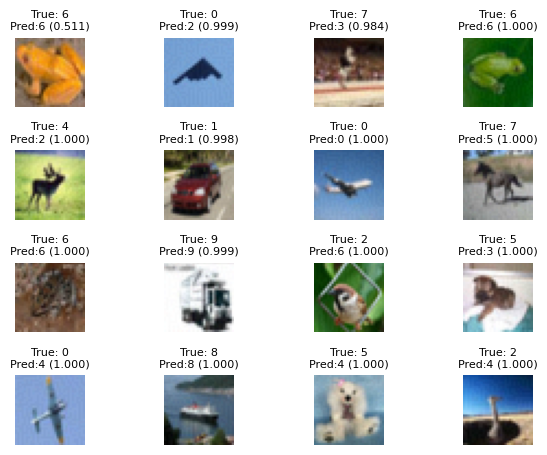

In [4]:
adversarial_example_trainer.display_adversarial_images(epsilon=0.01, num_images=16, titles=True, use_validation_dataset=True)

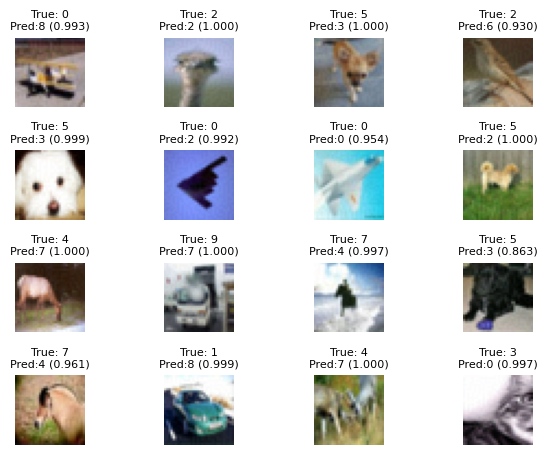

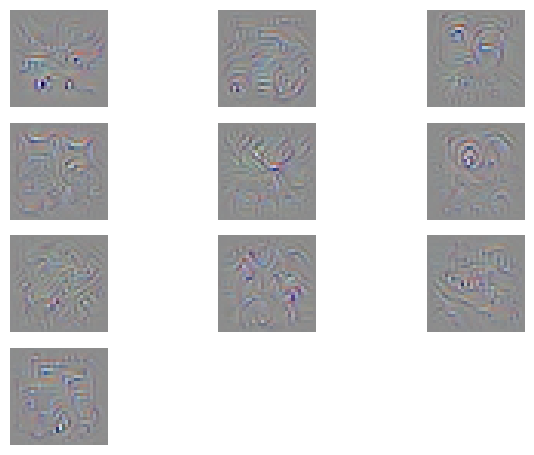

CLASS 0:
	Model Prediction: 0
	Confidence: 1.0
CLASS 1:
	Model Prediction: 1
	Confidence: 1.0
CLASS 2:
	Model Prediction: 2
	Confidence: 1.0
CLASS 3:
	Model Prediction: 3
	Confidence: 1.0
CLASS 4:
	Model Prediction: 4
	Confidence: 1.0
CLASS 5:
	Model Prediction: 5
	Confidence: 1.0
CLASS 6:
	Model Prediction: 6
	Confidence: 1.0
CLASS 7:
	Model Prediction: 7
	Confidence: 1.0
CLASS 8:
	Model Prediction: 8
	Confidence: 1.0
CLASS 9:
	Model Prediction: 9
	Confidence: 1.0


In [5]:
adversarial_example_trainer.display_adversarial_images(EPSILON, 16, True)
maximal_class_activations(model)